[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 288, number of used features: 10
[LightGBM] [Info] Start training from score 0.000635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

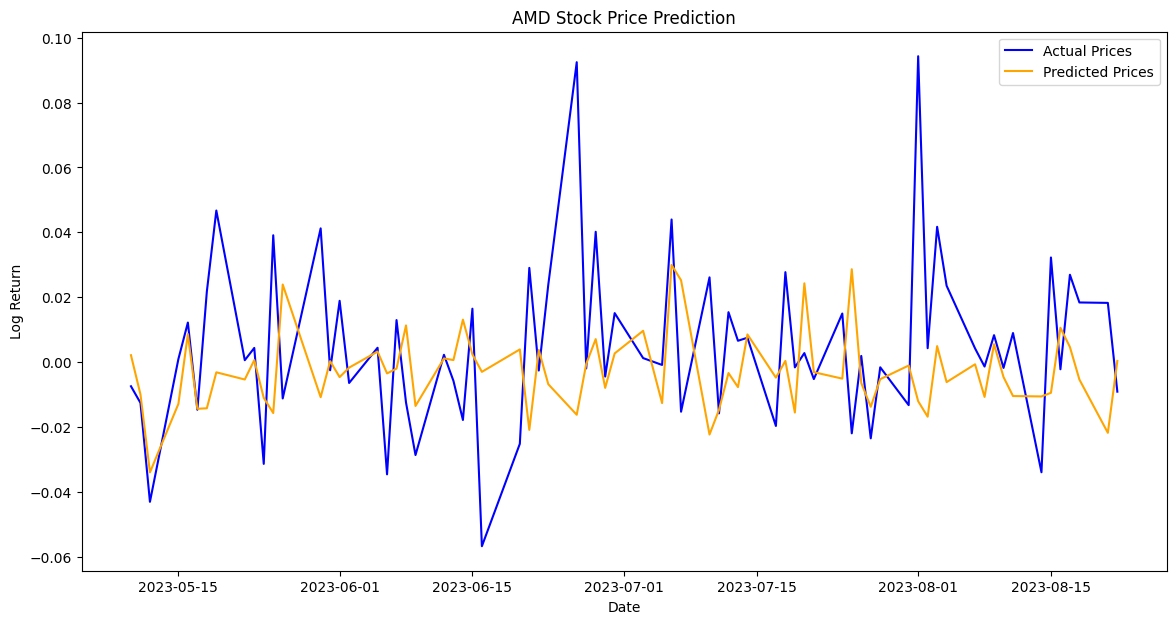

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yfin
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import re

# Step 1: Data Collection
data = yfin.download('AMD', start='2022-01-01', end='2023-12-31')
data['log_return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data.dropna(inplace=True)

# Step 2: Data Preparation
data['target'] = data['log_return'].shift(-90)  # Predicting 90 days ahead
data.dropna(inplace=True)

# Feature Engineering
for lag in [5, 10, 25, 50]:
    data[f'lag_{lag}'] = data['log_return'].shift(lag)

data.dropna(inplace=True)

# Clean feature names to avoid special characters
X = data.drop(columns=['target', 'log_return'])

# Function to clean column names
def clean_column_name(col):
    col = str(col)  # Ensure it's a string
    col = re.sub(r'\W+', '_', col)  # Replace any non-alphanumeric characters with underscores
    return col

X.columns = [clean_column_name(col) for col in X.columns]  # Clean column names
y = data['target']

# Step 3: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train)

# Step 4: Prediction
predictions = model.predict(X_test)

# Step 5: Evaluation
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Prices', color='orange')
plt.title('AMD Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()